# Loading the dataset 

This data is API requesed from [BreweryDB](https://www.brewerydb.com/developers/apps) website and the finlal working data is saved as csv file.

In [22]:
# Data analysis packages:
import pandas as pd
import numpy as np

# Visualization packages:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='sec1.3'></a>
## Understanding the data
The dataset used in this analysis is available at [BreweryDB](https://www.brewerydb.com/developers/apps).

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). Thus, the first lines of the dataset are shown below:

In [23]:
## Loading the dataset
beers = pd.read_csv('data/dirty_data.csv')

## Printing the number of samples in the dataset:
print('This dataset has {0} samples.'.format(len(beers)), 'and {} columns'.format(len(beers.columns)-1))

This dataset has 508400 samples. and 20 columns


In [25]:
# get the American-Style and Belgian-Style Pale Ale beers 
American_PA_abv = beers[beers['style_name'] == 'American-Style Pale Ale']['abv']
American_PA_abv = np.array(American_PA_abv[American_PA_abv.notnull()])

Belgian_PA_abv = beers[beers['style_name'] == 'Belgian-Style Pale Ale']['abv']
Belgian_PA_abv = np.array(Belgian_PA_abv[Belgian_PA_abv.notnull()])

## explore the mean, variance/standard divation and sample size 
print('\n' +'IBU metrix for American-Style Pale Ale (PA)')
print('----------------')
print('American-Style Pale Ale mean:',round(American_PA_abv.mean(),3))
print('American-Style Pale Ale standard divation:', (American_PA_abv.std()))
print('American-Style Pale Ale size:', len(American_PA_abv))
print('\n' +'IBU metrix for Belgian-Style Pale Ale (PA)')
print('----------------')
print('Belgian-Style Pale Ale mean:', round(Belgian_PA_abv.mean(),3))
print('Belgian-Style Pale Ale standard divation:', round(Belgian_PA_abv.std(),3))
print('Belgian-Style Pale Ale size:', len(Belgian_PA_abv))


IBU metrix for American-Style Pale Ale (PA)
----------------
American-Style Pale Ale mean: 5.98
American-Style Pale Ale standard divation: 0.7730459236035075
American-Style Pale Ale size: 50840

IBU metrix for Belgian-Style Pale Ale (PA)
----------------
Belgian-Style Pale Ale mean: 4.6
Belgian-Style Pale Ale standard divation: 0.0
Belgian-Style Pale Ale size: 10168


In [28]:
len(Belgian_PA_abv)

10168

## 1. Set a null and alternative Hypotheses
### The Null Hypothesis

The null hypothesis is there is no difference in Alcohol By Volume between American-Style Pale Ale and Belgian-Style Pale Ale.

>**$H_{0}$: The mean ABV difference between American-Style PA and Belgian-Style PA is zero. i.e. $H_{0} = H_{1}$**

### The Alternate Hypothesis

>**$H_{1}$ (2-tailed): The mean difference between American-Style and Belgian-Style PA is different.**

## 2. Choosing the significance level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

## 3. Calculate t-statistic 

Two independent samples t-test is used to compare the means of ABV between American-Style and Belgian-Style PA.

The formula used to calculate the two-sample t-statistic and variance are: 

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [ ]:
import test_moduls as test

## 4. Interpret the result

In [32]:
Belgian_PA_abv
test.pooled_variance(Belgian_PA_abv, American_PA_abv)
test.twosample_tstatistic(Belgian_PA_abv, American_PA_abv)

Null hypothesis is True with t-statistic =  -180.0049 critical t-value =  1.96 and p-value =  1.0
The groups contains 10168 and  50840 observations,
     having a mean of 4.6 and 5.98 respectivelly


-180.0049475000563

In [19]:
test.twosample_tstatistic(American_PA_abv, Belgian_PA_abv)
# test_moduls.p_value_welch_ttest(ipa_sample, pilsener_sample, two_sided=True)

Null hypohesis rejected. Results are statistically significant
         with t-statistic =  180.0049 critical t-value =  1.96 and p-value =  0.0
The groups contains 50840 and  10168 observations,
     having a mean of 5.98 and 4.6 respectivelly


180.0049475000563

### ---------------------------- end -----------------------------

## Using Welch's t-test

### One sample t-test

In [ ]:
ttest(American_PA_abv_sample, 5.88, 0.05)

In [ ]:
visualize_t(t_stat, len(ipa_sample), len(pilsener_sample))

In [ ]:
np.unique(ipa_ibu)

### ABV of American Style Pilsner
American Pilsners, particularly Imperial Pilsners, typically have an alcohol content between 6.5% and 9% alcohol by volume. 


In [ ]:
samp_pilsener = np.array(random.choices(pilsener, k=50))
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(pilsener_stand, hist=False)

In [ ]:
import test_moduls as test
sampling_from_five_ibu = np.array(random.choices(array1, k=50))

In [ ]:
mu = 7.75
pilsener_stand = np.array([(p - pilsener.mean())/pilsener.std() for p in pilsener])
# test.ttest(pilsener, mu, 0.05)



In [ ]:
beers.style_name.value_counts()

In [ ]:
pilsener = beers[beers['style_name'] == 'American-Style Pilsener'][['abv', 'ibu', 'gravity']] # 
pilsener.gravity.value_counts()

In [ ]:
import random
random.seed(2019)
# sampling with replacement 
pilsener_sampling = np.array(random.choices(pilsener, k=3000))
print('sampling with choices():', len(pilsener_sampling))

ipa_sampling = np.array(random.choices(ipa, k=3000))
print('sampling with choices():', len(ipa_sampling))

print(f'This is for the {} samples'.format(len(ipa_sampling)))
print('---------------------------')
print('American-Style Pilsener mean:',round(pilsener_sampling.mean(),3))
print('American-Style Pilsener standard divation:', round(pilsener_sampling.std(),3))
print('American-Style Pilsener size', len(pilsener_sampling))
print('American-Style India Pale Ale mean', round(ipa_sampling.mean(),3))
print('American-Style India Pale Ale standard divation:', round(ipa_sampling.std(),3))
print('American-Style India Pale Ale size', len(ipa_sampling))


# Draw a plot showing overlapping of distribution means and sds for incpection
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(pilsener_sampling, hist=False)
sns.distplot(ipa_sampling, hist=False)

### Welch test

In [ ]:
import test_moduls
test_moduls.p_value_welch_ttest(pilsener_sampling, ipa_sampling, two_sided=True)


### Standerdizing the data here

In [ ]:
print(ipa_sampling)

In [ ]:
beers.style_name.value_counts()

In [ ]:
new_beer = beers[['ibu', 'abv']]
nb = new_beer[new_beer.notnull().all(axis=1)]
# nb.info()
print(nb.ibu.value_counts())

In [ ]:
print(nb.abv.value_counts())

In [ ]:
nb_five = nb[nb['abv']==5.0]
nb_ten = nb[nb['abv']==4.5]
print('ABV counnts are', nb_five.abv.value_counts())
print('ABV counnts are', nb_ten.abv.value_counts())
# nb_ten

In [ ]:
nb_ten

## Two-independent sample t-test

In [ ]:
# get a sample of 50 from the two independent groups
array_5_ibu, array_10_ibu = np.array(nb_five.ibu), np.array(nb_ten.ibu)
# sampling with replacemtnt
import random
sampling_from_five_ibu = np.array(random.choices(array1, k=50))
sampling_from_ten_ibu = np.array(random.choices(array2, k=50))
# mean_ibu_for_five_abv = nb_five.ibu.mean()
# print(mean_ibu_for_five_abv 
print('sampling fifty items from a 20336 items of five ibu list', len(sampling_from_five_ibu))
print('sampling fifty items from a 10186 items of five ibu list', len(sampling_from_ten_ibu))

In [ ]:
print('Five ibu mean',sampling_from_five_ibu.mean())
print('Five ibu standard divation', sampling_from_five_ibu.std())
print('Five ibu size', len(sampling_from_five_ibu))
print('Ten ibu mean', sampling_from_ten_ibu.mean())
print('Ten ibu standard divation', sampling_from_ten_ibu.std())
print('Ten ibu size', len(sampling_from_ten_ibu))
# control.mean()

In [ ]:
array2

In [ ]:
import cleaning_data as cd

In [ ]:
# cleaning dataset and pulling only the three columns
beer_vital_stats = cd.beer_vital_stats(beers)
beer_vital_stats.head()

In [ ]:
beer_vital_stats.info()

In [ ]:
# Check the box plot to see the data is uniform
import visualization as vis
vis.boxplot(beer_vital_stats)

Check the variability or dispersion of the data using boxplot

In [ ]:
print(beer_vital_stats.min()) 
print(beer_vital_stats.max())

In [ ]:
beer_vital_stats.ibu.value_counts()

## IBU Hypothesis

In [ ]:
beers.head(3)

In [ ]:
pilsener_ibu = beers[beers['style_name'] == 'American-Style Pilsener']['ibu'] # 40672
pilsener_ibu = np.array(pilsener_ibu[pilsener_ibu.notnull()])
# ipa == India Pale Ale
ipa_ibu = beers[beers['style_name'] == 'American-Style India Pale Ale']['ibu'] # 40672
ipa_ibu = np.array(ipa_ibu[ipa_ibu.notnull()])

# IBU comparision
print('Working data information')
print('--------------------------')
print('American-Style Pilsener mean:',round(pilsener_ibu.mean(),3))
print('American-Style Pilsener standard divation:', round(pilsener_ibu.std(),3))
print('American-Style Pilsener size', len(pilsener_ibu))
print('American-Style India Pale Ale mean', round(ipa_ibu.mean(),3))
print('American-Style India Pale Ale standard divation:', round(ipa_ibu.std(),3))
print('American-Style India Pale Ale size', len(ipa_ibu))

In [ ]:
# Draw a plot showing overlapping of distribution means and sds for incpection
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(pilsener_ibu, hist=False)
sns.distplot(ipa_ibu, hist=False)

In [ ]:
# pil_ibu = beers[beers['style_name'] == 'American-Style Pilsener']['ibu']
beers.ibu.value_counts()

In [ ]:
beers.gravity.value_counts()

In [ ]:
og_ibu = beers[beers['gravity'] == 1.051]['ibu']
og_ibu.unique()

In [ ]:
abv = beers[beers['abv']==4.5][['ibu','gravity']]
abv.info()

## Dataset from kaggle

In [45]:
# Data analysis packages:
import pandas as pd
import numpy as np

# Visualization packages:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# statistical analysis
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
brewery = pd.read_csv('data/beer_and_brewery.csv')
brewery.head()

,Unnamed: 0,beer_id,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [35]:
# Hypotesis question would be.... how is the differecne in ABV between colerado and ca
CO_brewery = brewery[brewery.state == 'CO']['abv']
CA_brewery = brewery[brewery.state == 'CA']['abv']
CO_brewery = CO_brewery[~np.isnan(CO_brewery)]
CA_brewery = CA_brewery[~np.isnan(CA_brewery)]
print('Sample Alcohol by Volume (ABV) mean in Colorado', round(CO_brewery.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado', round(CO_brewery.var(), 5))
print("---------------------------------")
print('Sample Alcohol by Volume (ABV) mean in California', round(CA_brewery.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado', round(CA_brewery.var(), 5))

Sample Alcohol by Volume (ABV) mean in Colorado 0.063
Sample Alcohol by Volume (ABV) variance in Colorado 0.00021
---------------------------------
Sample Alcohol by Volume (ABV) mean in California 0.061
Sample Alcohol by Volume (ABV) variance in Colorado 0.00023


According to [thedenverchannel](https://www.thedenverchannel.com/money/consumer/colorado-grocers-can-offer-full-strength-beer-on-jan-1), prior to 2019, the beer sold at Colorado grocery and convenience stores is limited to 3.2 percent alcohol by weight, or 4 percent alcohol by volume. To find beer with higher alcohol content — typically known as full-strength beer — you must shop at liquor stores.

other laws [bystate](https://www.legalbeer.com/liquor-laws-by-state)

In [36]:
# # samp_pilsener = np.array(random.choices(pilsener, k=50))
# sns.set(color_codes=True)
# sns.set(rc={'figure.figsize':(10,5)})
# sns.distplot(CA_brewery, hist=False)
# sns.distplot(CO_brewery, hist=False)

# Two Sample T-Test
When we know the variance is equal in the sample from the group
## Calculating the t-statistic
we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [51]:
import test_moduls  as test
t_stat = test.twosample_tstatistic(CO_brewery, CA_brewery)

Null hypothesis is True with t-statistic =  1.5843 , critical t-value =  1.9655 and p-value =  0.0569
The groups contains 250 and  182 observations. Means are:  0.0634 and 0.0611 respectivelly


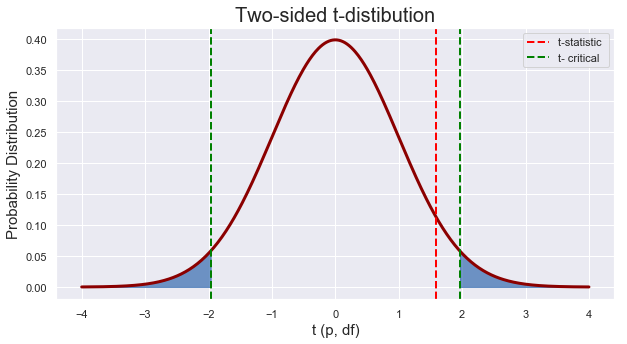

In [52]:
import visualization
import numpy as np
visualization.visualize_t(t_stat, len(CO_brewery), len(CA_brewery))

In [53]:
# taking only 50 sample 
np.random.seed(20000)
CO_sample = np.random.choice(CO_brewery, size=50)
CA_sample = np.random.choice(CA_brewery, size=50)
print('Sample Alcohol by Volume (ABV) mean in Colorado', round(CO_sample.mean(), 3))
print('Sample Alcohol by Volume (ABV) standard divation in Colorado', round(CO_sample.var(), 5))
print("---------------------------------")
print('Sample Alcohol by Volume (ABV) mean in California', round(CA_sample.mean(), 3))
print('Sample Alcohol by Volume (ABV) standard divation in Colorado', round(CA_sample.var(), 5))

Sample Alcohol by Volume (ABV) mean in Colorado 0.062
Sample Alcohol by Volume (ABV) standard divation in Colorado 0.00015
---------------------------------
Sample Alcohol by Volume (ABV) mean in California 0.058
Sample Alcohol by Volume (ABV) standard divation in Colorado 0.00023


Null hypothesis is True with t-statistic =  1.2324 , critical t-value =  1.9845 and p-value =  0.1104
The groups contains 50 and  50 observations. Means are:  0.0619 and 0.0585 respectivelly


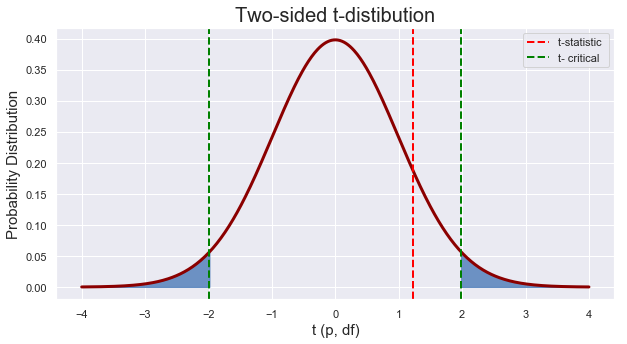

In [54]:
# calculate t-statistic 
t_stat_sample = test.twosample_tstatistic(CO_sample, CA_sample)

# visualize the output
visualization.visualize_t(t_stat_sample, len(CO_sample), len(CA_sample))


# Welchs test
Welch's t-test is most common hypothesis test used in a two-sample test to infer the two populations have equal means. Welch test more reliable when the two samlples have unequal variances and/or unequal sample sizes.

Let us check our data first.

In [55]:
CO_ibu = brewery[brewery.state == 'CO']['ibu']
CA_ibu = brewery[brewery.state == 'CA']['ibu']
CO_ibu = CO_ibu[~np.isnan(CO_ibu)]
CA_ibu = CA_ibu[~np.isnan(CA_ibu)]
print('Sample Alcohol by Volume (ABV) mean in Colorado:', round(CO_ibu.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado: ', round(CO_ibu.var(), 5))
print('Sample size is: ', CO_ibu.size)
print("---------------------------------")
print('Sample Alcohol by Volume (ABV) mean in California: ', round(CA_ibu.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado: ', round(CA_ibu.var(), 5))
print('Sample size is', CA_ibu.size)

Sample Alcohol by Volume (ABV) mean in Colorado: 47.432
Sample Alcohol by Volume (ABV) variance in Colorado:  679.21252
Sample size is:  146
---------------------------------
Sample Alcohol by Volume (ABV) mean in California:  46.281
Sample Alcohol by Volume (ABV) variance in Colorado:  752.80077
Sample size is 135


There is clear unequality in variance and sample sizes between our two population groups, so Welchs test is a better candidate than two-sample t-test

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [59]:
# import test_moduls that contain function helpful to make weltch test
import test_moduls as test
welch_t = test.welch_t(CO_ibu, CA_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(CO_ibu, CA_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,2))

# converting this to p_value 
p_welch = test.p_value_welch_ttest(CO_ibu, CA_ibu)

Welch's t-statistic is:  0.3596
Welch's degrees of fredoom (df): 274.37
We fail to reject the Null hypothesis with t-value =  0.3596 , critical t-value =  1.6504 , and p-value =  0.3597


## ANOVA test on IBU between Washington State, Minnesota, and DMV Area 

### Step 1: State the Null Hypothesis

The null would be that there will be no difference among the groups mean. Specifically in more statistical language the null for an ANOVA is that the means are the same. We state the Null hypothesis as:

$H_{0}$: $\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$


### Step 2: State the Alternative Hypothesis

$H_{a}$: not all means are equal

### Step 3: Set alpha ($\alpha$)

The typical alpha ($\alpha$) value  of 0.05 is used for this analysis. 


### Step 4: Collect Data

In [107]:
WA_ibu = np.array(brewery[brewery.state == 'MA']['ibu'])
MN_ibu = np.array(brewery[brewery.state == 'MN']['ibu'])
DMV_ibu = np.array(brewery[brewery.state.isin(['DC', 'MD', 'VA'])]['ibu'])

# removing nan valus incase there are any 
WA_ibu = WA_ibu[~np.isnan(WA_ibu)]
MN_ibu = MN_ibu[~np.isnan(MN_ibu)]
DMV_ibu = DMV_ibu[~np.isnan(DMV_ibu)]

# print some information about our data 
print('Sample International Bitterness Units (IBU) mean in Washington State:', round(WA_ibu.mean(), 3))
print('Sample International Bitterness Units (IBU) variance in Washington State: ', round(WA_ibu.var(), 5))
print('Sample size is: ', WA_ibu.size)
print("---------------------------------")
print('Sample International Bitterness Units (IBU) mean in Minnisota: ', round(MN_ibu.mean(), 3))
print('Sample International Bitterness Units (IBU) variance in Minnisota: ', round(MN_ibu.var(), 5))
print('Sample size is', MN_ibu.size)
print("---------------------------------")
print('Sample International Bitterness Units (IBU) mean in DMV: ', round(DMV_ibu.mean(), 3))
print('Sample International Bitterness Units (IBU) variance in DMV: ', round(DMV_ibu.var(), 5))
print('Sample size is', DMV_ibu.size)

Sample International Bitterness Units (IBU) mean in Washington State: 38.0
Sample International Bitterness Units (IBU) variance in Washington State:  592.35294
Sample size is:  51
---------------------------------
Sample International Bitterness Units (IBU) mean in Minnisota:  49.957
Sample International Bitterness Units (IBU) variance in Minnisota:  661.38941
Sample size is 46
---------------------------------
Sample International Bitterness Units (IBU) mean in DMV:  44.429
Sample International Bitterness Units (IBU) variance in DMV:  787.95918
Sample size is 49


It is clear that the mean, variance and sample size are different for all the three samples from the three groups. So, we chose to do one way ANOVA.

### Step 5: Calculate a test statistic

In [145]:
## Note that all_data is a (20,4) numpy_ndarray
# ss_total = ((all_data - overall_mean)**2).sum()

## Function that calculates between group error
def ss_between_groups(sample_list):
    # Calculate the total variability in the response variable
#     X_bar = np.stack(sample_list, axis=1).mean()
    X_bar = np.concatenate((sample_list)).mean()
    terms = [len(sample)*(sample.mean() - X_bar)**2 for sample in sample_list]
    return np.sum(terms)
# print(ss_between_groups([x1, x2, x3, x4]))
def ss_within_groups(sample_list):
    terms = [(sample - sample.mean())**2 for sample in sample_list]
    return np.sum(terms)

In [174]:
## Or we can apply directly scipy.stats's f_oneway method 
n1, n2, n3 = 51, 46, 49
k = 3
import scipy.stats

# scipy.stats.f_oneway(WA_ibu, MN_ibu, DMV_ibu)
t_anova, p_value = scipy.stats.f_oneway(WA_ibu, MN_ibu, DMV_ibu)
print(t_anova)
print(p_value)

2.5044605046266124
0.08529868911260605


In [192]:
import numpy
import scipy.stats as stats
dfn = k - 1
dfd = n1 + n2 + n3 

def f_distribution(dfn, dfd, t_anova, p_anova, alpha=0.05,):
    fig, ax = plt.subplots(1, 1)
    
    x = np.linspace(stats.f.ppf(0.01, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 100)
    t_crit = stats.f.ppf((1-alpha), dfn, dfd)
    y = stats.f.pdf(x, dfn, dfd)
    
    ax.plot(x, y, 'r-', lw=5, alpha=alpha, label='f pdf')
    ax.axvline(t_anova, color='red', linestyle='--', lw=2, label='t-anova ')
    ax.axvline(t_crit, color='green', linestyle='--', lw=2, label='t- critical')
    ax.fill_betweenx(y, x, t_crit, where=x > t_crit, color='#376cb0', alpha=0.7)
    rv = stats.f(dfn, dfd)
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    plt.title('F-PDF (one-sided test at alpha = {})'. format(alpha), size=20)
    plt.xlabel('Value of F', size=25)
    plt.ylabel('Probability Density', size =15)
    
    t_anova, p_value = scipy.stats.f_oneway(WA_ibu, MN_ibu, DMV_ibu)
    
    # hypothesis testing    
    if (t_anova > t_crit and p_anova < alpha):

        print("""Null hypohesis rejected. Results are statistically significant
         with t-statistic = """, round(t_anova, 4), ", critical t-value = ",
              round(t_crit, 4), "and p-value = ", round(p_anova, 4))
    else:
        print('Null hypothesis is True with t-statistic = ',
              round(t_anova, 4), ", critical t-value = ",
              round(t_crit, 4), 'and p-value = ', round(p_anova, 4))

    ax.legend(loc='best', frameon=False)
    

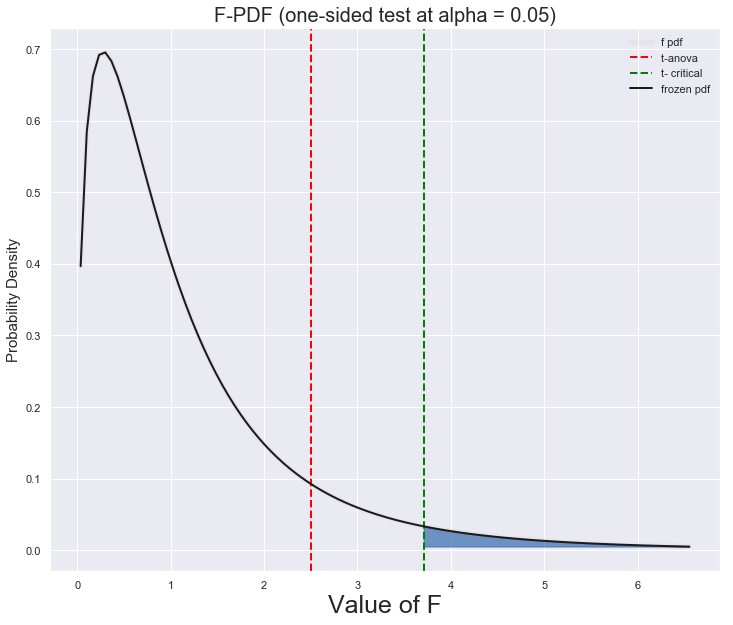

In [193]:
f_distribution(3, 10)

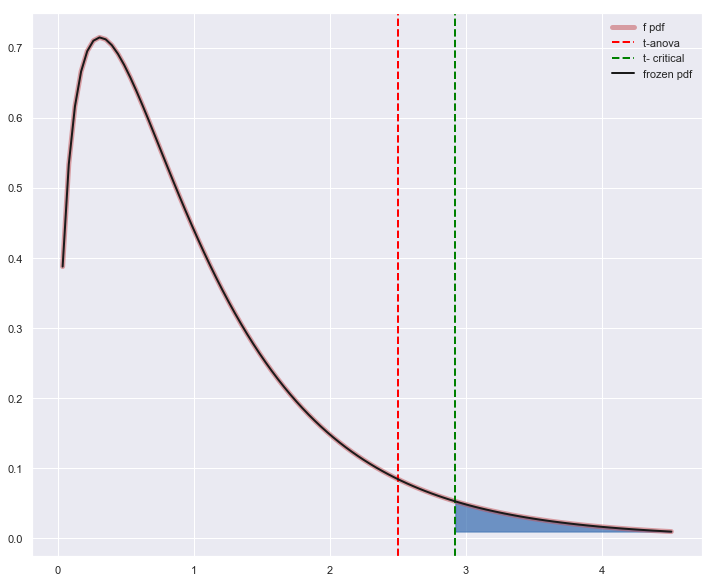

In [183]:
fig, ax = plt.subplots(1, 1)
dfn, dfd = 3, 30


x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)
t_crit = stats.f.ppf(0.95, dfn, dfd)
y = stats.f.pdf(x, dfn, dfd)

# ax.plot(x, stats.f.pdf(x, dfn, dfd),
#        'r-', lw=5, alpha=0.5, label='f pdf')
ax.plot(x, y, 'r-', lw=5, alpha=0.5, label='f pdf')
ax.axvline(t_anova, color='red', linestyle='--', lw=2, label='t-anova ')
ax.axvline(t_crit, color='green', linestyle='--', lw=2, label='t- critical')
ax.fill_betweenx(y, x, t_crit, where=x > t_crit, color='#376cb0', alpha=0.7)
rv = stats.f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

ax.legend(loc='best', frameon=False)

### Step 6: Construct Acceptance / Rejection regions

### Step 7: Based on steps 5 and 6, draw a conclusion about $H_{0}$


### Playground 

In [ ]:
ipa_lst = np.array([(i - ipa_sampling.mean())/ipa_sampling.std() for i in ipa_sampling])
pilsener_lst = np.array([(p - pilsener_sampling.mean())/pilsener_sampling.std() for p in pilsener_sampling])

print('This is after standerdization of the 50 samples')
print('---------------------------')
print('American-Style Pilsener mean:',round(pilsener_lst.mean(),3))
print('American-Style Pilsener standard divation:', round(pilsener_lst.std(),3))
print('American-Style Pilsener size', len(pilsener_lst))
print('American-Style India Pale Ale mean', round(ipa_lst.mean(),3))
print('American-Style India Pale Ale standard divation:', round(ipa_lst.std(),3))
print('American-Style India Pale Ale size', len(ipa_lst))

# Draw a plot showing overlapping of distribution means and sds for incpection
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(pilsener_lst, hist=False)
sns.distplot(ipa_lst, hist=False)

In [ ]:
## Take 50 sample from American-Style  and Belgian-Style Pale Ale
import numpy as np
np.random.seed(2019)
American_PA_abv_sample = np.random.choice(American_PA_abv, size=50)
Belgian_PA_abv_sample = np.random.choice(Belgian_PA_abv, size=50)
print('Mean ABV for American-Style Pale Ale', round(American_PA_abv_sample.mean(),2))
print('Mean ABV for Belgian-Style Pale Ale', round(Belgian_PA_abv_sample.mean(),2))

In [ ]:
## import the two sample t statistc module
# import test_moduls as hyp_test
alpha = 0.05

## Calculate the t statsits
t_stat = twosample_tstatistic(American_PA_abv_sample, Belgian_PA_abv_sample)

print('t-statistic value:', t_stat)
t_crit = stats.t.ppf(q=1-0.05, df=98)
print('t-critial value:', t_crit)

In [ ]:
## copied the same thing for ibu 
# print('Beer style count:', beers.style_name.value_counts())
pilsener_ibu = beers[beers['style_name'] == 'American-Style Pilsener']['ibu'] # 40672
pilsener_ibu = np.array(pilsener_ibu[pilsener_ibu.notnull()])
print('>> There are {} American-Style Pilsener records in the dataset.'.format(len(pilsener_ibu)))
# ipa == India Pale Ale
ipa_ibu = beers[beers['style_name'] == 'American-Style India Pale Ale']['ibu'] # 40672
ipa_ibu = np.array(ipa_ibu[ipa_ibu.notnull()])
print('>> There are {} American-Style IPA records in the dataset.'.format(len(ipa_ibu)))

# IBU comparision
print('\n' +'IBU metrix for American-Style Pilsener and India Pale Ale (IPA)')
print('--------------')
print('American-Style Pilsener mean:',round(pilsener_ibu.mean(),3))
print('American-Style Pilsener standard divation:', round(pilsener_ibu.std(),3))
print('American-Style Pilsener size:', len(pilsener_ibu))
print('American-Style India Pale Ale mean:', round(ipa_ibu.mean(),3))
print('American-Style India Pale Ale standard divation:', round(ipa_ibu.std(),3))
print('American-Style India Pale Ale size:', len(ipa_ibu))

In [ ]:
def boxplot(dataset):
    """Make a box plot for each column of ``x``.

    Parameters
    ----------
    X : Array or a sequence of vectors

    """
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), sharey=False)

    axs[0].boxplot(dataset.abv, labels=['ABV'], notch=True, showmeans=True)
    axs[0].set_title('Alcohol By Volume')
    axs[1].boxplot(dataset.gravity, labels=['OG'], notch=True, showmeans=True)
    axs[1].set_title('Original Gravity')
    axs[2].boxplot(dataset.ibu, labels=['IBU'], notch=True, showmeans=True)
    axs[2].set_title('International Bitterness Units')

In [218]:
# load packages
import pandas as pd
# load data file
d = pd.read_csv("https://reneshbedre.github.io/myfiles/anova/onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments

In [219]:
d

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [220]:
# # load packages
# import scipy.stats as stats
# # stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [222]:
d.reset_index

list

In [226]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [224]:
d_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40
